# KPDVE lists

In [1]:
import pt_keypattern
import harmony_state
import pt_utils
import pt_musicutils
import jupyter_pt_tools as jpt_pt
import IPython.display as ipd

harmony = harmony_state.harmony_state()

## All possibilities... not as many as you might think...

Notes are useless without context. Chords are almost as bad -- but not quite. Once we hear a chord, we begin to narrow down the possibilities of what sounds might come next, and what sorts of sounds likely preceded it. For example, the following example analyzes the potential functions of a C Major chord:

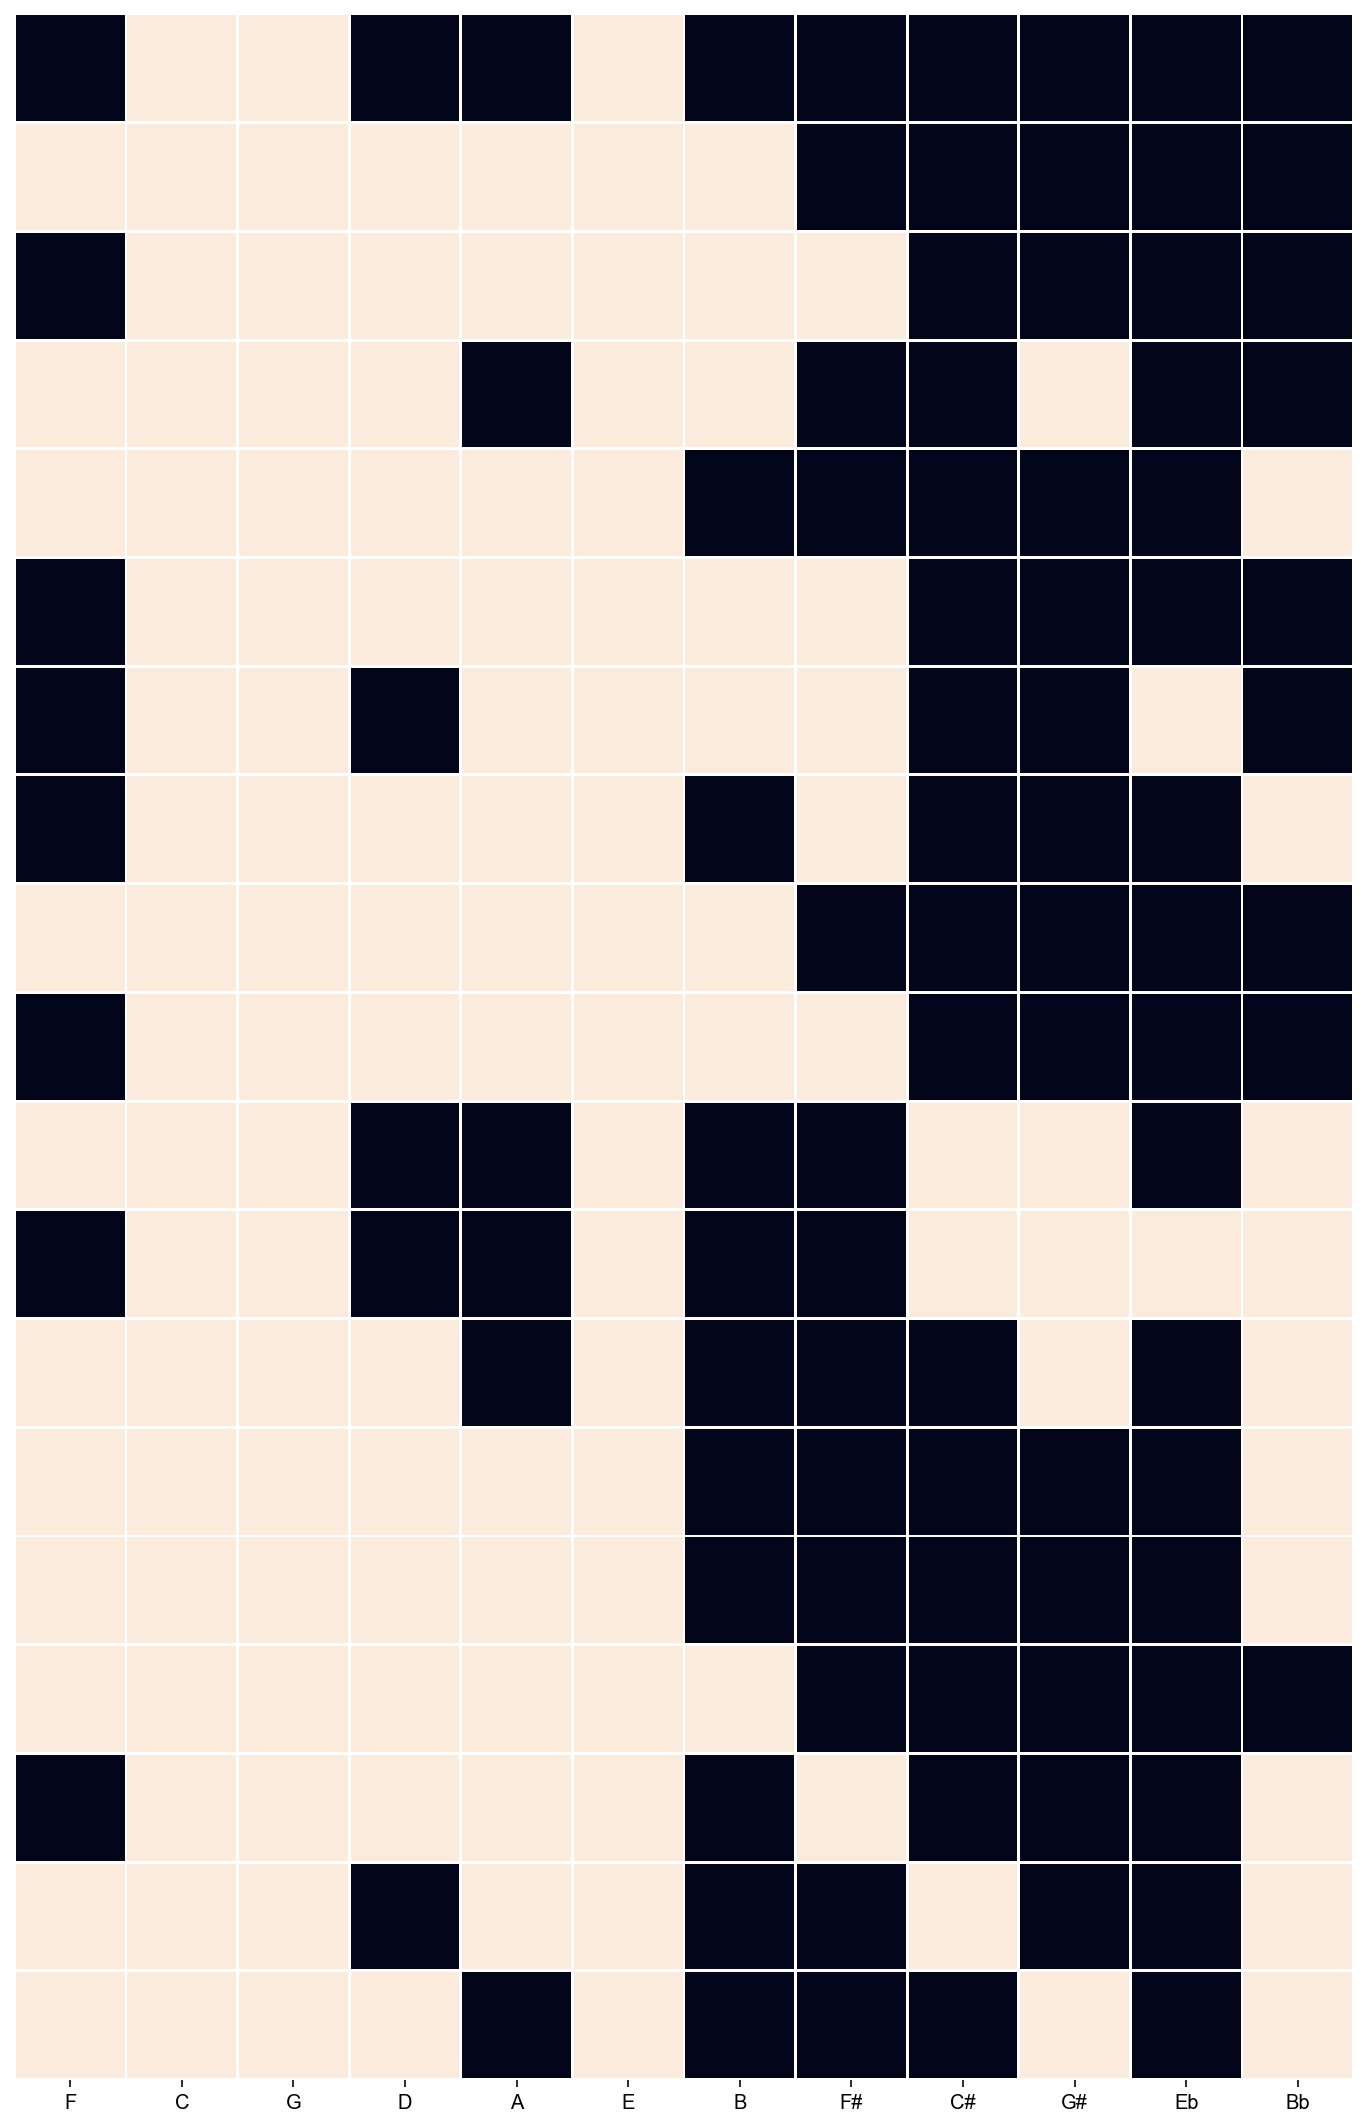

In [2]:
CM_triad = 0b100010010000
harmony.change_notegroup(CM_triad)

binary_list = [pt_utils.c_chrom_to_f_circle(CM_triad)] + [pt_keypattern.get_binary_KP(kpdve[0], kpdve[1]) for kpdve in harmony.current_kpdve_list]
jpt_pt.multiple_notegroup_heatmap(binary_list) 

patterns = [mode + disp for mode, disp in [pt_musicutils.get_tonic_mode_disp_tuple(kpdve) for kpdve in harmony.current_kpdve_list]]
sequence = jpt_pt.link_ordered_wavestep_sequences(patterns, duration=10)
ipd.Audio(sequence, rate=4000)

It's a lot to remember, it would seem. But for a computer, it's as close to nothing as you can get: not a single bit of arithmetic, only logic operations.

## Finding Chord Function: Backpropagation in miniature, and self-tying knots.

What results is a dialogue between the unity of a single note and the unity of a seven-note mode. To make this dialogue we require chords. We find chords by measuring the *easiest* way to reach them from whatever sounds preceded them. We do this by considering each note as a possible root in each possible key. The closest key and pattern, reachable in the fewest number of steps, yields the strongest candidate for the chord that functions in our ear. When our ears are active and our minds are lazy, we hear harmony.